In [1]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from yahoofinancials import YahooFinancials

In [2]:
#cumulative returns, standard deviations and Sharpe ratios to analyse individual stocks

In [3]:
tickersymbols= ['AAPL','JPM','NVDA']
start = '2010-01-01'
end = '2020-12-20'
time = 'daily'

In [4]:
stock_ticker = (tickersymbols[0]) # Stock Ticker
stock_name = YahooFinancials(stock_ticker)
data = stock_name.get_historical_price_data(start_date=start,
                                               end_date =end,
                                               time_interval =time)
A1 = pd.DataFrame(data[stock_ticker]['prices'])
A1

,date,high,low,open,close,volume,adjclose,formatted_date
0,1262615400,7.660714,7.585000,7.622500,7.643214,493729600,6.593423,2010-01-04
1,1262701800,7.699643,7.616071,7.664286,7.656429,601904800,6.604822,2010-01-05
2,1262788200,7.686786,7.526786,7.656429,7.534643,552160000,6.499765,2010-01-06
3,1262874600,7.571429,7.466071,7.562500,7.520714,477131200,6.487749,2010-01-07
4,1262961000,7.571429,7.466429,7.510714,7.570714,447610800,6.530882,2010-01-08
...,...,...,...,...,...,...,...,...
2756,1607956200,123.349998,121.540001,122.599998,121.779999,79184500,121.779999,2020-12-14
2757,1608042600,127.900002,124.129997,124.339996,127.879997,157572300,127.879997,2020-12-15
2758,1608129000,128.369995,126.559998,127.410004,127.809998,98208600,127.809998,2020-12-16
2759,1608215400,129.580002,128.039993,128.899994,128.699997,94359800,128.699997,2020-12-17


In [5]:
stock_ticker = (tickersymbols[1]) # Stock Ticker
stock_name = YahooFinancials(stock_ticker)
data = stock_name.get_historical_price_data(start_date=start,
                                               end_date =end,
                                               time_interval =time)
B1 = pd.DataFrame(data[stock_ticker]['prices'])

In [6]:
stock_ticker = (tickersymbols[2]) # Stock Ticker
stock_name = YahooFinancials(stock_ticker)
data = stock_name.get_historical_price_data(start_date=start,
                                               end_date =end,
                                               time_interval =time)
C1 = pd.DataFrame(data[stock_ticker]['prices'])

In [7]:
columns = ['close','formatted_date']
A1 = pd.DataFrame(A1, columns=columns)

B1 = pd.DataFrame(B1, columns=columns)

C1 =  pd.DataFrame(C1, columns=columns) 


In [8]:
A2 = A1.set_index('formatted_date')
B2 = B1.set_index('formatted_date')
C2 = C1.set_index('formatted_date')

In [9]:
C2

,close
formatted_date,
2010-01-04,18.490000
2010-01-05,18.760000
2010-01-06,18.879999
2010-01-07,18.510000
2010-01-08,18.549999
...,...
2020-12-14,532.349976
2020-12-15,534.419983
2020-12-16,529.700012


In [10]:
stocks_df = pd.concat([A2, B2, C2], axis='columns', join='inner')
stocks_df.columns = (tickersymbols)
Numstock= [15,5,13]


In [11]:
stocks_df

,AAPL,JPM,NVDA
formatted_date,,,
2010-01-04,7.643214,42.849998,18.490000
2010-01-05,7.656429,43.680000,18.760000
2010-01-06,7.534643,43.919998,18.879999
2010-01-07,7.520714,44.790001,18.510000
2010-01-08,7.570714,44.680000,18.549999
...,...,...,...
2020-12-14,121.779999,118.300003,532.349976
2020-12-15,127.879997,120.320000,534.419983
2020-12-16,127.809998,120.669998,529.700012


In [12]:
stocks_df_pcc = stocks_df.pct_change().dropna()

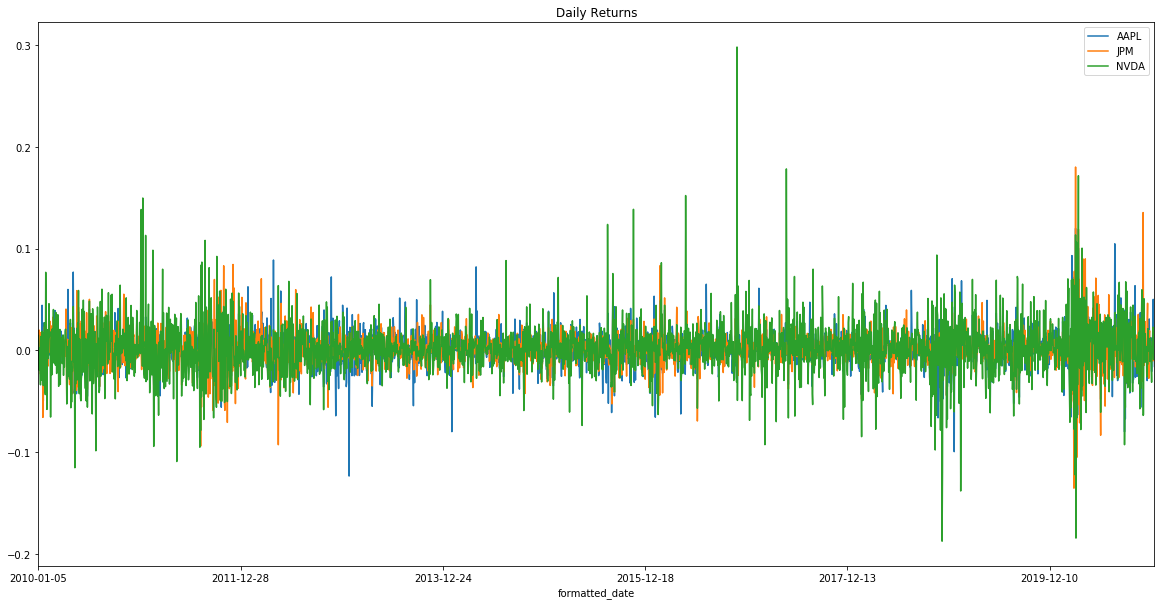

In [13]:
stocks_df_pcc.plot(figsize=(20, 10), title="Daily Returns");


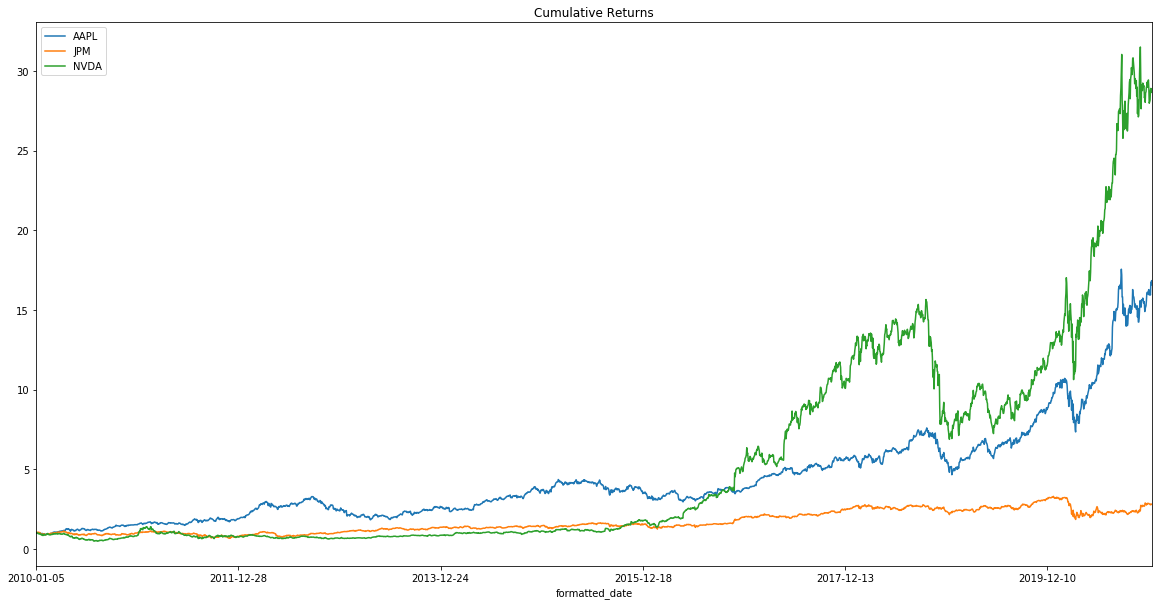

In [14]:
# Calculate cumulative returns
cumulative_returns = (1 + stocks_df_pcc).cumprod()
cumulative_returns.plot(figsize=(20, 10), title="Cumulative Returns");

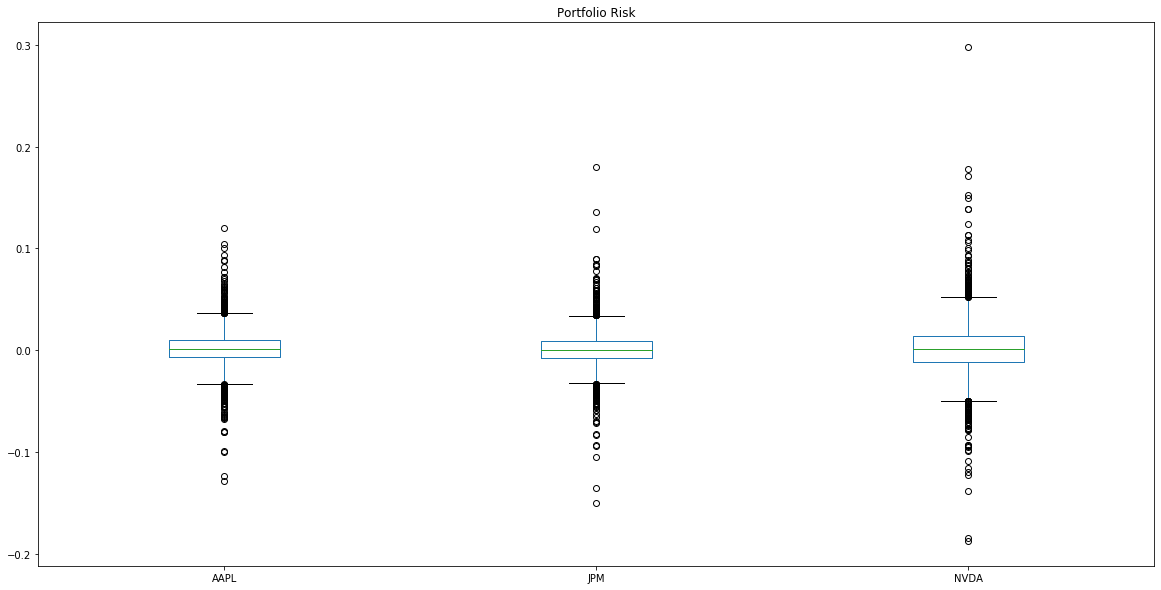

In [15]:
stocks_df_pcc.plot.box(figsize=(20, 10), title="Portfolio Risk");

In [16]:
#standard deviation of each stock

In [17]:
stocks_df_pcc.std()

AAPL    0.017842
JPM     0.018256
NVDA    0.026763
dtype: float64

In [18]:
# Calculate annualized standard deviation (252 trading days)
stocks_df_pcc.std() * np.sqrt(252)


AAPL    0.283240
JPM     0.289798
NVDA    0.424843
dtype: float64

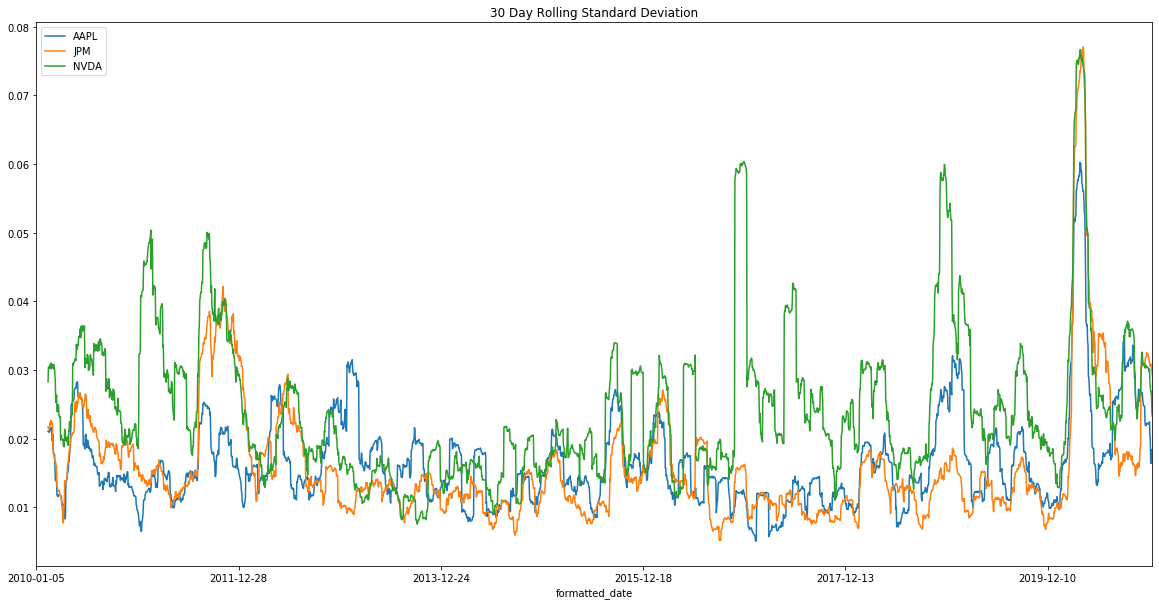

In [19]:
# Calculate and plot the rolling standard deviation for each stock using a 30 trading day window
stocks_df_pcc.rolling(window=30).std().plot(figsize=(20, 10), title="30 Day Rolling Standard Deviation");

In [20]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (stocks_df_pcc.mean() * 252) / (stocks_df_pcc.std() * np.sqrt(252))
sharpe_ratios = sharpe_ratios.sort_values(ascending=False)
sharpe_ratios


AAPL    1.047303
NVDA    0.932740
JPM     0.466788
dtype: float64

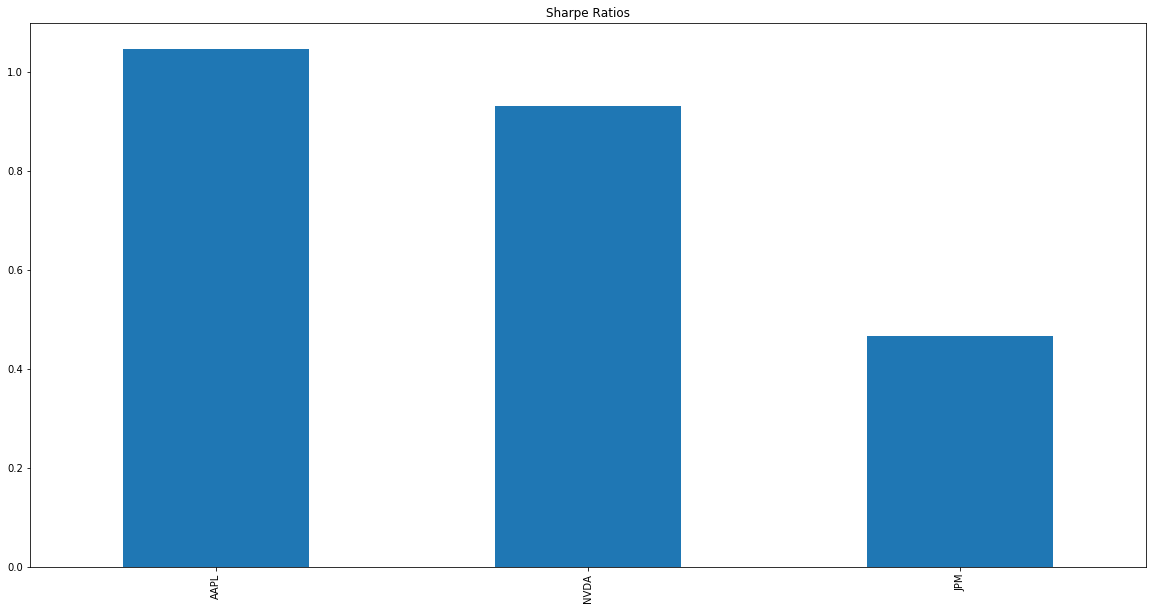

In [21]:
sharpe_ratios.plot(figsize=(20, 10), kind="bar", title="Sharpe Ratios");

In [22]:
#Value at risk using Historical Simulation

In [23]:
stocks1 = stocks_df
stocks1.iloc[:,0]

formatted_date
2010-01-04      7.643214
2010-01-05      7.656429
2010-01-06      7.534643
2010-01-07      7.520714
2010-01-08      7.570714
                 ...    
2020-12-14    121.779999
2020-12-15    127.879997
2020-12-16    127.809998
2020-12-17    128.699997
2020-12-18    126.660004
Name: AAPL, Length: 2761, dtype: float64

In [24]:

stocks1['Portfoliovalue'] =(stocks1.iloc[:,0]*Numstock[0])+(stocks1.iloc[:,1]*Numstock[1])+(stocks1.iloc[:,2]*Numstock[2])
stocks1['perc_change'] = stocks1['Portfoliovalue'].pct_change()

In [25]:
valuelocforpercentile = round(len(stocks1)) * (1-(95 / 100))
valuelocforpercentile

138.05000000000013

In [26]:
stocks1['DollarChange'] = stocks1.loc[stocks1.index.max()]['Portfoliovalue'] * stocks1['perc_change'] #calculate money change based on current valuation

In [27]:
sortedhistdata = stocks1.sort_values(by = ['DollarChange'])
print(sortedhistdata)

                      AAPL         JPM        NVDA  Portfoliovalue  \
formatted_date                                                       
2020-03-16       60.552502   88.360001  196.399994     3903.287449   
2018-11-16       48.382500  109.989998  164.429993     3413.277390   
2020-03-12       62.057499   88.050003  216.309998     4183.142467   
2019-01-28       39.075001  103.879997  138.009995     2899.654926   
2020-09-03      120.879997  101.330002  520.619995     9087.909904   
...                    ...         ...         ...             ...   
2017-05-10       38.314999   87.430000  121.290001     2588.644993   
2020-03-13       69.492500  103.910004  240.839996     4692.857475   
2020-03-24       61.720001   88.430000  249.179993     4607.289925   
2016-11-11       27.107500   76.690002   87.970001     1933.672529   
2010-01-04        7.643214   42.849998   18.490000      569.268203   

                perc_change  DollarChange  
formatted_date                             
2

In [28]:
VaR_Result = sortedhistdata.iloc[round(valuelocforpercentile) + 1,len(sortedhistdata.columns)-1] * np.sqrt(5)
print('The portfolio\'s VaR is:', round(VaR_Result,2))

The portfolio's VaR is: -587.57


In [29]:
# ES
#Expected Shortfall,VaR assumes that the risk in the tail-end of the distribution is improbable with a thin tail

In [30]:
es_result = round(sortedhistdata['DollarChange'].head(round(valuelocforpercentile)).mean(axis=0),2)* np.sqrt(5)
es_result

-936.9348432521869

C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys
C:\Users\Alex\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Alex\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


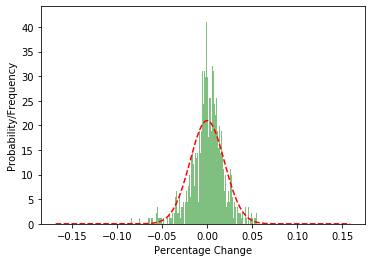

In [31]:
import scipy
import scipy.stats
def plotme():
    data1 = stocks1['perc_change']
    num_bins = 1000
    # the histogram of the data
    n, bins, patches = plt.hist(data1, num_bins, normed=1, facecolor='green', alpha=0.5)
    # add a 'best fit' line
    sigma =  stocks1['perc_change'].std()
    data2 = scipy.stats.norm.pdf(bins, 0, sigma)
    plt.plot(bins, data2, 'r--')
    plt.xlabel('Percentage Change')
    plt.ylabel('Probability/Frequency')
    # Tweak spacing to prevent clipping of ylabel
    plt.subplots_adjust(left=0.15)
    plt.show()
    

plotme()


In [33]:
#monte carlo simulation of risk 

In [62]:
Numstock

[15, 5, 13]

In [63]:
stocks1

,AAPL,JPM,NVDA,Portfoliovalue,perc_change,DollarChange
formatted_date,,,,,,
2010-01-04,7.643214,42.849998,18.490000,569.268203,NaN,NaN
2010-01-05,7.656429,43.680000,18.760000,577.126437,0.013804,129.713519
2010-01-06,7.534643,43.919998,18.879999,578.059628,0.001617,15.194160
2010-01-07,7.520714,44.790001,18.510000,577.390715,-0.001157,-10.873620
2010-01-08,7.570714,44.680000,18.549999,578.110702,0.001247,11.717421
...,...,...,...,...,...,...
2020-12-14,121.779999,118.300003,532.349976,9338.749680,0.014989,140.845551
2020-12-15,127.879997,120.320000,534.419983,9467.259735,0.013761,129.308059
2020-12-16,127.809998,120.669998,529.700012,9406.600113,-0.006407,-60.207782


In [64]:
x1 = (stocks1.iloc[0,0]*Numstock[0])/stocks1.iloc[0,3]

In [65]:
x2 = (stocks1.iloc[0,1]*Numstock[1])/stocks1.iloc[0,3]

In [66]:
x3 = (stocks1.iloc[0,2]*Numstock[2])/stocks1.iloc[0,3]

In [67]:
portfolio_composition = [(tickersymbols[0],x1),(tickersymbols[1],x2),(tickersymbols[2],x3)]

In [68]:
portfolio_composition

[('AAPL', 0.20139577939944228),
 ('JPM', 0.3763603716555613),
 ('NVDA', 0.42224384894499645)]

In [69]:
portfolio_composition = [('AAPL',0.20),('JPM',0.38),('NVDA',0.42)]

In [76]:
import yfinance
returns = pd.DataFrame({})

for t in portfolio_composition:
  name = t[0]
  ticker = yfinance.Ticker(name)
  data = ticker.history(interval="1d",start=start,end=end)
  data['return_%s' % (name)] = data['Close'].pct_change(1)

  returns = returns.join(data[['return_%s' % (name)]],how="outer").dropna()

In [77]:
def simulate_returns(historical_returns,forecast_days):
  return historical_returns.sample(n = forecast_days, 
                                   replace = True).reset_index(drop = True)

In [79]:
simulate_returns(returns['return_AAPL'],1000)

0      0.018970
1      0.006160
2      0.004065
3      0.011070
4     -0.011254
         ...   
995    0.070572
996   -0.017561
997    0.000000
998   -0.016906
999    0.008065
Name: return_AAPL, Length: 1000, dtype: float64

In [80]:
def simulate_portfolio(historical_returns,composition,forecast_days):
  result = 0
  for t in composition:
    name,weight = t[0],t[1]
    s = simulate_returns(historical_returns['return_%s' % (name)], forecast_days)
    result = result + s * weight
  
  return(result)

In [81]:
simulate_portfolio(returns,portfolio_composition,10)

0   -0.007676
1   -0.015508
2   -0.004155
3   -0.014185
4    0.007758
5    0.003561
6   -0.006812
7   -0.005595
8   -0.043240
9    0.000525
dtype: float64

In [82]:
def simulate_modified_returns(historical_returns,forecast_days,correct_mean_by):
  h = historical_returns.copy()

  new_series = h + correct_mean_by

  return new_series.sample(n=forecast_days,replace=True).reset_index(drop=True)

In [83]:
def simulate_modified_portfolio(historical_returns,composition,forecast_days):
  result = 0
  for t in composition:
    name,weight,correction = t[0],t[1],t[2]
    s = simulate_modified_returns(historical_returns['return_%s' % (name)], forecast_days,correction)
    result = result + s * weight
  
  return(result)

In [84]:
def simulation(historical_returns,composition,forecast_days,n_iterations):
  simulated_portfolios = None

  for i in range(n_iterations):
    sim = simulate_modified_portfolio(historical_returns,composition,forecast_days)

    sim_port = pd.DataFrame({'returns_%d' % (i) : sim})

    if simulated_portfolios is None:
      simulated_portfolios = sim_port
    else:
      simulated_portfolios = simulated_portfolios.join(sim_port)
    
  return simulated_portfolios

In [85]:
returns.mean(axis=0)

return_AAPL    0.001231
return_JPM     0.000637
return_NVDA    0.001603
dtype: float64

In [96]:

portfolio_composition = [('AAPL', 0.2,-0.0001), ('JPM', 0.38,-0.0001), ('NVDA', 0.42,-0.0005)]

In [97]:
forecast_days = 50
n_iterations = 100

In [98]:
simulated_portfolios = simulation(returns,portfolio_composition,forecast_days,n_iterations)

In [99]:
simulated_portfolios.head()

,returns_0,returns_1,returns_2,returns_3,returns_4,returns_5,returns_6,returns_7,returns_8,returns_9,...,returns_90,returns_91,returns_92,returns_93,returns_94,returns_95,returns_96,returns_97,returns_98,returns_99
0,-0.006520,0.000660,-0.009750,0.002209,0.001503,-0.006185,0.004278,0.013106,0.003496,0.002579,...,0.012567,-0.012966,-0.019271,0.007925,-0.001034,-0.015143,0.024060,-0.003818,0.008277,0.030861
1,-0.000294,0.020406,-0.002277,-0.008042,0.003348,-0.004773,0.016077,-0.005074,-0.001518,-0.051468,...,-0.019004,0.006838,-0.001960,-0.010392,0.005408,0.007439,-0.013651,0.006205,0.012319,0.006089
2,0.002957,-0.004472,-0.010090,0.001852,-0.012936,-0.022615,0.002794,-0.000213,0.030570,0.002406,...,0.000815,0.010456,0.039878,-0.004627,0.028087,0.007715,0.008027,0.005224,0.013558,-0.000667
3,0.002353,0.000443,-0.000866,0.006236,0.012541,0.002671,0.014262,-0.002005,0.005993,0.020624,...,0.008229,-0.001169,-0.015911,0.021240,-0.003181,-0.014768,-0.010354,0.023861,0.003432,0.010029
4,0.001419,-0.016521,-0.020314,0.011509,0.000043,0.015205,-0.010477,0.023663,-0.015979,-0.002983,...,-0.007278,0.000686,0.037727,0.011121,-0.004981,0.013139,-0.028341,-0.011972,-0.028011,-0.003242


In [100]:
percentile_5th = simulated_portfolios.cumsum().apply(lambda x : np.percentile(x,5),axis=1)
percentile_95th = simulated_portfolios.cumsum().apply(lambda x : np.percentile(x,95),axis=1)
average_port = simulated_portfolios.cumsum().apply(lambda x : np.mean(x),axis=1)

In [101]:
print(percentile_5th.tail(1))
print(percentile_95th.tail(1))
print(average_port.tail(1))

49   -0.1154
dtype: float64
49    0.218974
dtype: float64
49    0.041112
dtype: float64


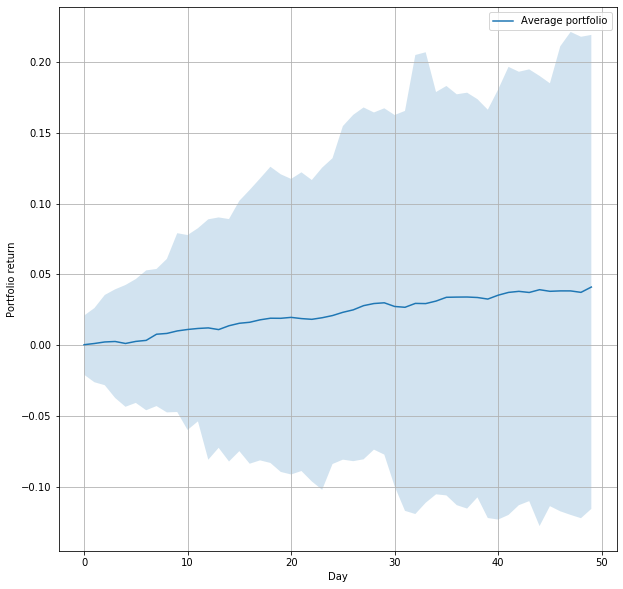

In [102]:
x = range(forecast_days)

plt.rcParams['figure.figsize'] = [10, 10]

plt.plot(x,average_port,label="Average portfolio")
plt.xlabel("Day")
plt.ylabel("Portfolio return")


plt.fill_between(x, percentile_5th, percentile_95th,alpha=0.2)
plt.grid()
plt.legend()

plt.show()

In [103]:
sharpe_indices = simulated_portfolios.apply(lambda x : np.mean(x)/np.std(x))

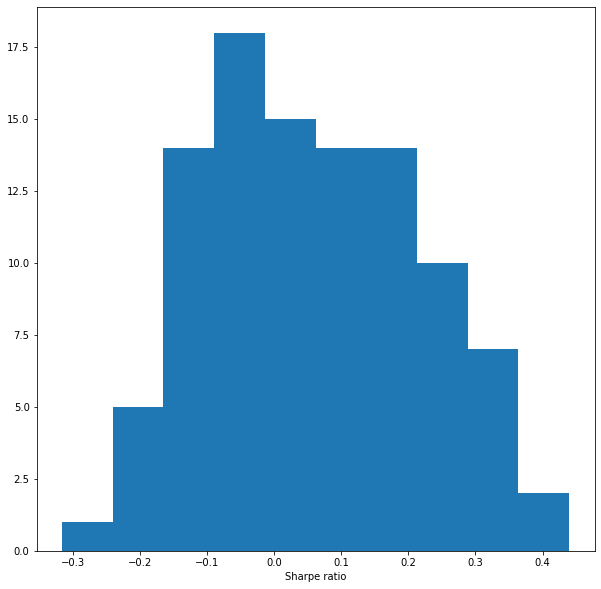

In [104]:
plt.hist(sharpe_indices,bins="rice")
plt.xlabel("Sharpe ratio")

plt.show()

In [105]:
np.mean(sharpe_indices)

0.05894140634224155